In [1]:
import pandas as pd

# Load the dataset
file_path = 'Crowd data for anomaly detection.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,timestamp,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,label2,Severity_level
0,0:05:36,0.4225,19.1176,1.1432,89.1222,81,0.81,-0.0027,1,0,normal,0
1,0:05:37,0.3704,19.5130,1.1476,89.5976,83,0.83,-0.0027,1,0,normal,0
2,0:05:38,0.3999,19.8316,1.1466,89.4905,86,0.86,-0.0051,1,0,normal,0
3,0:05:39,0.3787,20.0386,1.1521,89.2123,88,0.88,-0.0009,1,0,normal,0
4,0:05:40,0.4031,20.4625,1.1499,89.2521,88,0.88,-0.0012,1,0,normal,0


In [3]:
# Drop the non-numeric columns
data_numeric = data.drop(columns=['timestamp', 'label2'])

# Display the first few rows to confirm
print(data_numeric.head())


        X        Y   Speed  Heading  AgentCount  Density     Acc  \
0  0.4225  19.1176  1.1432  89.1222          81     0.81 -0.0027   
1  0.3704  19.5130  1.1476  89.5976          83     0.83 -0.0027   
2  0.3999  19.8316  1.1466  89.4905          86     0.86 -0.0051   
3  0.3787  20.0386  1.1521  89.2123          88     0.88 -0.0009   
4  0.4031  20.4625  1.1499  89.2521          88     0.88 -0.0012   

   LevelOfCrowdness  label  Severity_level  
0                 1      0               0  
1                 1      0               0  
2                 1      0               0  
3                 1      0               0  
4                 1      0               0  


In [5]:
# Calculate the Interquartile Range (IQR) for each numeric column
iqr_values = data_numeric.apply(lambda x: x.quantile(0.75) - x.quantile(0.25))

# Display the IQR values
print(iqr_values)


X                     0.09230
Y                     1.11720
Speed                 0.50920
Heading               1.32215
AgentCount          202.00000
Density               2.02000
Acc                   0.01530
LevelOfCrowdness      2.00000
label                 1.00000
Severity_level        1.00000
dtype: float64


In [7]:
from scipy.stats import zscore

# Calculate the z-scores for each numeric column
z_scores = data_numeric.apply(zscore)

# Display the first few rows of z-scores
print("Z-scores:")
print(z_scores.head())


Z-scores:
          X         Y     Speed   Heading  AgentCount   Density  Acc  \
0  1.520675 -0.723185  1.432952 -0.248261   -1.014795 -1.014795  NaN   
1  0.749318 -0.395174  1.448705 -0.149296   -1.002863 -1.002863  NaN   
2  1.186075 -0.130874  1.445125 -0.171591   -0.984965 -0.984965  NaN   
3  0.872202  0.040846  1.464815 -0.229505   -0.973032 -0.973032  NaN   
4  1.233452  0.392500  1.456939 -0.221219   -0.973032 -0.973032  NaN   

   LevelOfCrowdness     label  Severity_level  
0         -0.918124 -0.637515       -0.594115  
1         -0.918124 -0.637515       -0.594115  
2         -0.918124 -0.637515       -0.594115  
3         -0.918124 -0.637515       -0.594115  
4         -0.918124 -0.637515       -0.594115  


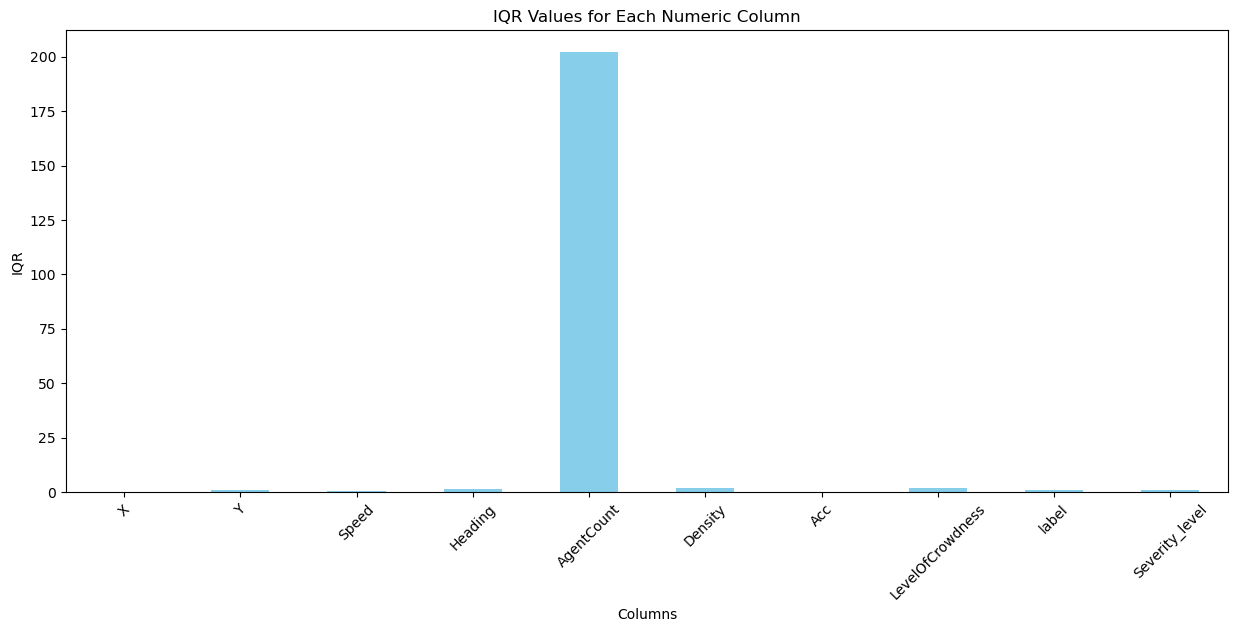

In [9]:
import matplotlib.pyplot as plt

# Calculate the IQR values
iqr_values = data_numeric.apply(lambda x: x.quantile(0.75) - x.quantile(0.25))

# Create a bar plot of the IQR values
plt.figure(figsize=(15, 6))
iqr_values.plot(kind='bar', color='skyblue')
plt.title('IQR Values for Each Numeric Column')
plt.xlabel('Columns')
plt.ylabel('IQR')
plt.xticks(rotation=45)
plt.savefig('IQR.png')

plt.show()


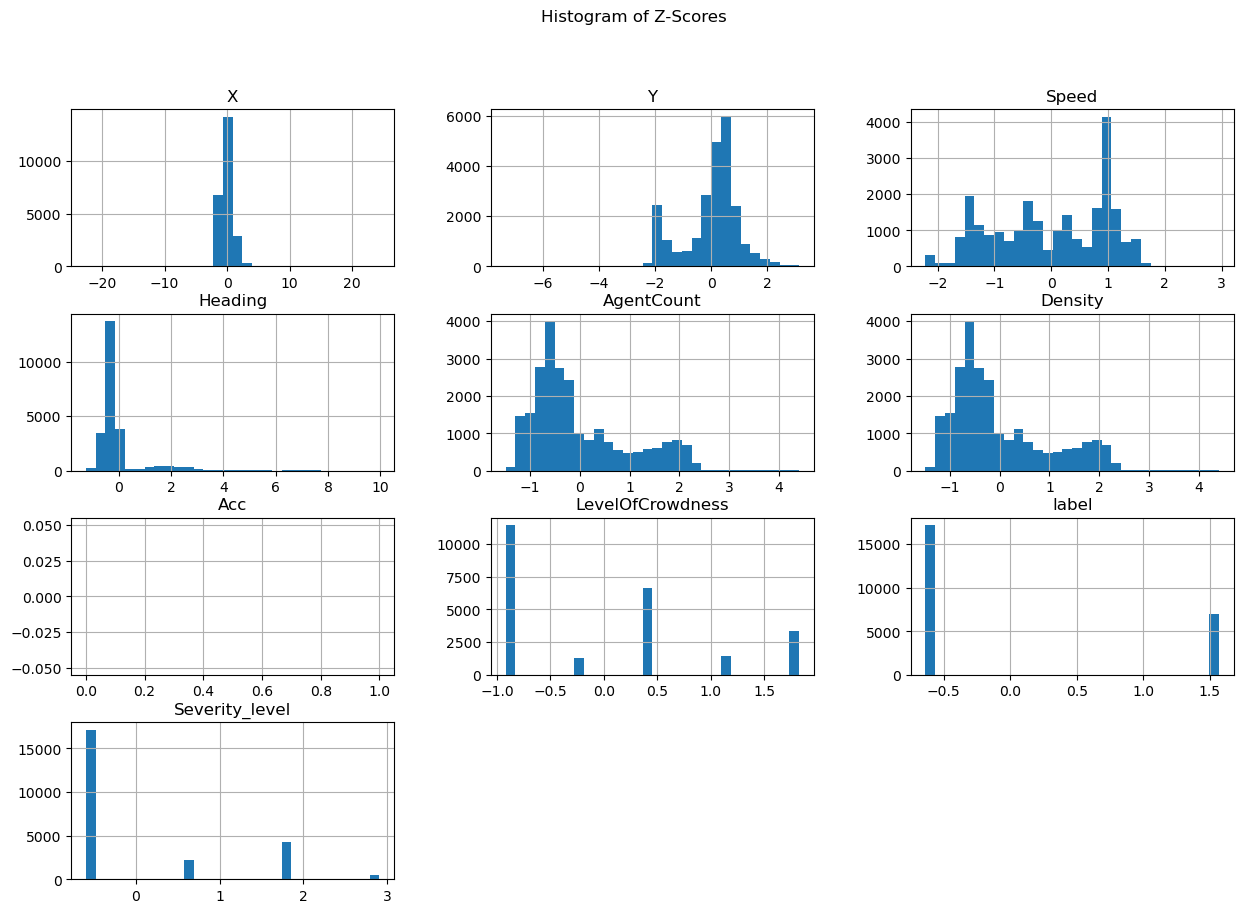

NameError: name 'sns' is not defined

<Figure size 1500x1000 with 0 Axes>

In [11]:
z_scores.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histogram of Z-Scores')
plt.show()

# Box Plot
plt.figure(figsize=(15, 10))
sns.boxplot(data=z_scores, orient='h')
plt.title('Box Plot of Z-Scores')
plt.show()

# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(z_scores, cmap='coolwarm', center=0, annot=False, linewidths=.5)
plt.title('Heatmap of Z-Scores')
plt.show()

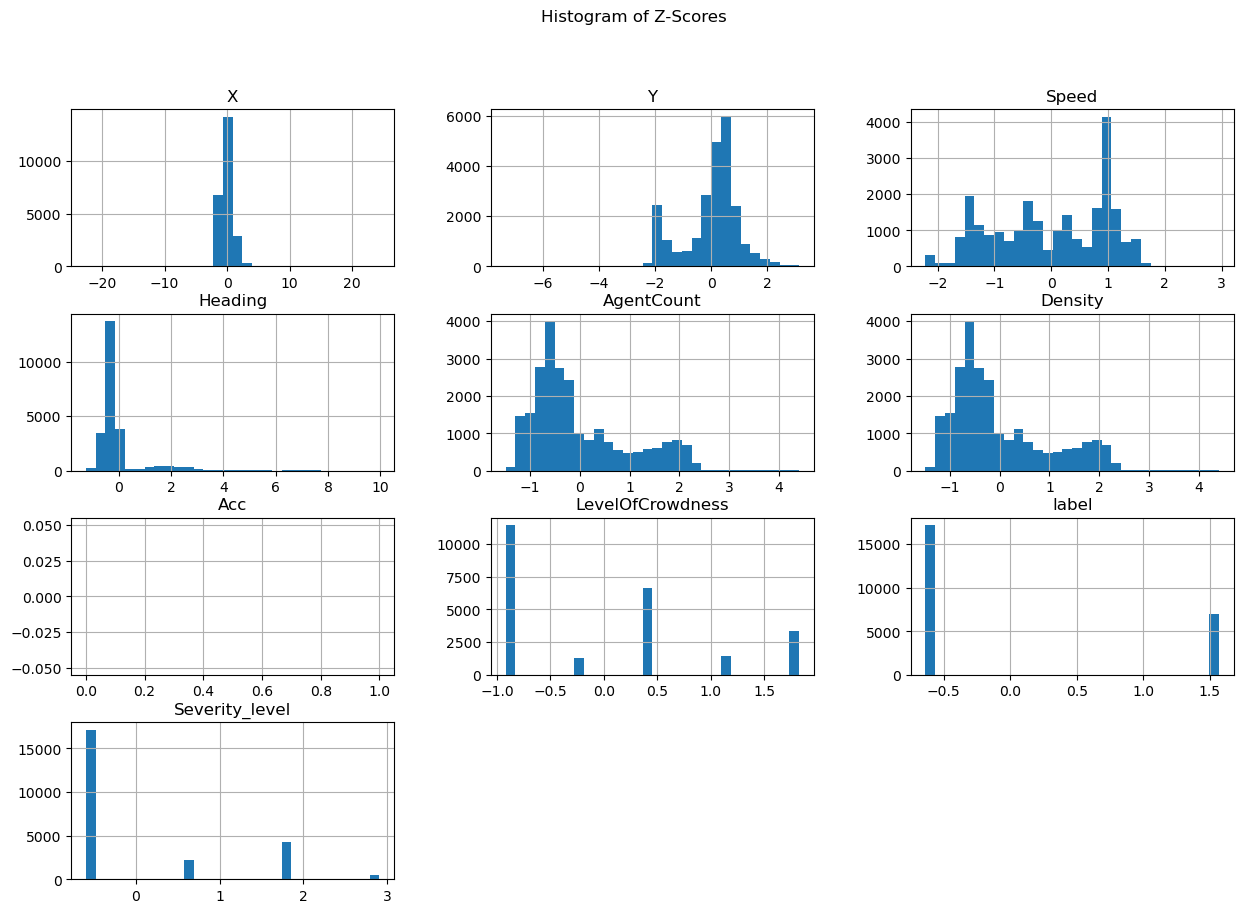

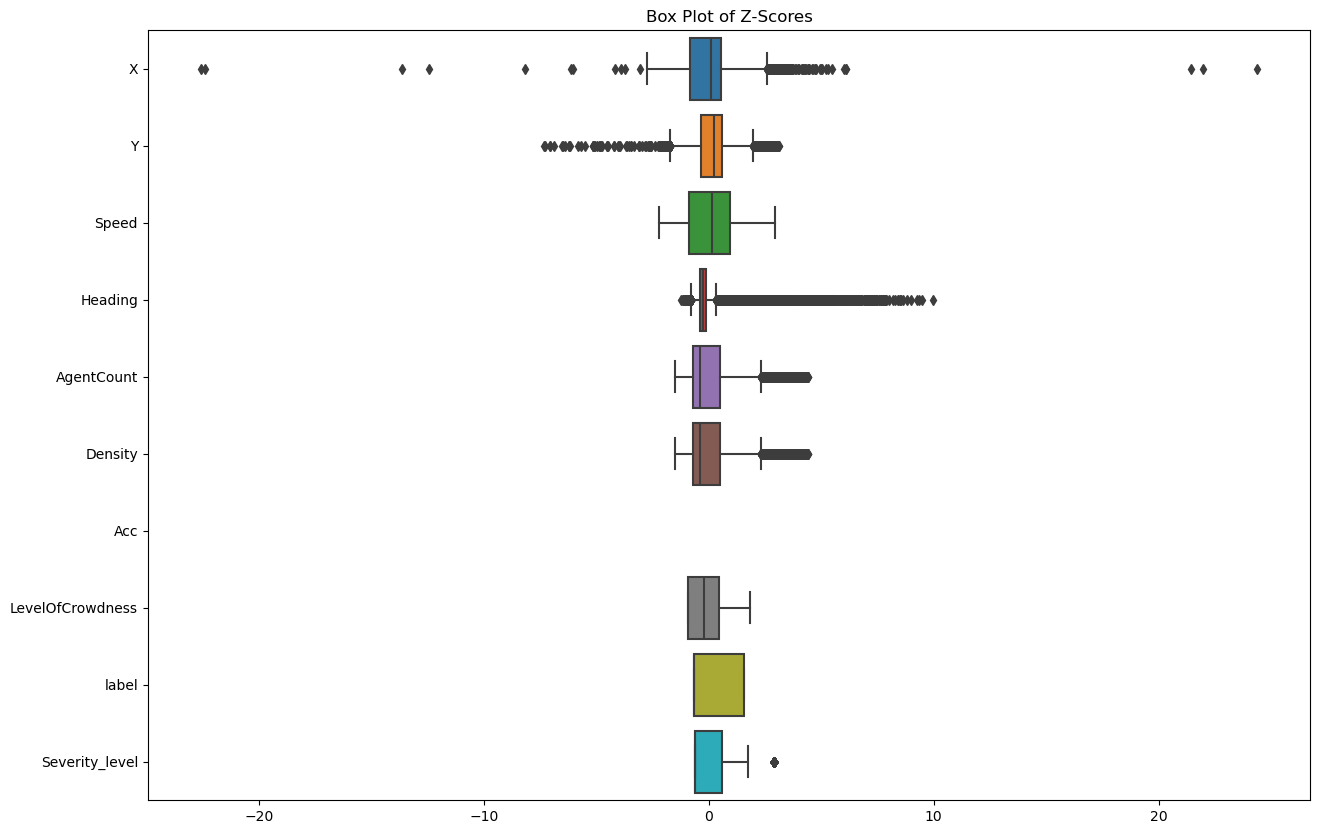

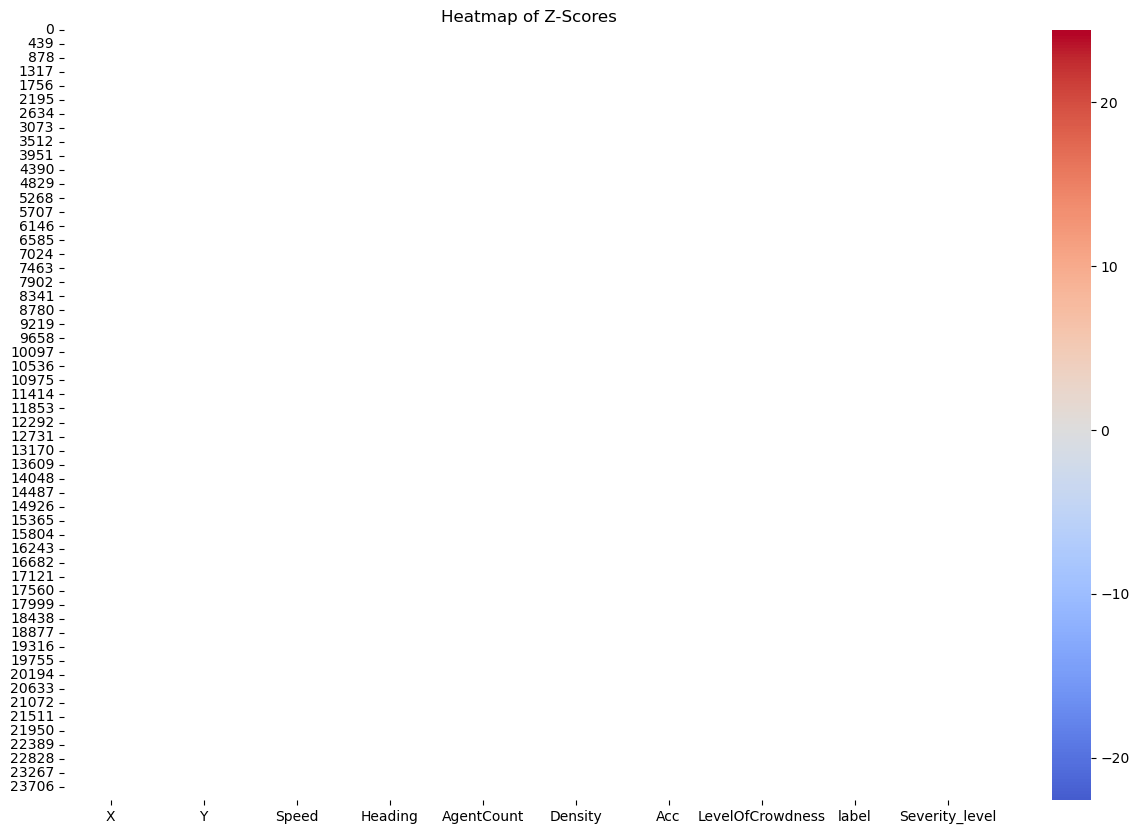

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
z_scores.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histogram of Z-Scores')
plt.savefig('Histogram of Z-Scores.png')
plt.show()

# Box Plot
plt.figure(figsize=(15, 10))
sns.boxplot(data=z_scores, orient='h')
plt.title('Box Plot of Z-Scores')
plt.savefig('Box Plot of Z-Scores.png')
plt.show()

# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(z_scores, cmap='coolwarm', center=0, annot=False, linewidths=.5)
plt.title('Heatmap of Z-Scores')
plt.show()
